In [4]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

#Library for saving data
import pickle

#other libraries
import pandas as pd
import numpy as np

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [5]:

df=pd.read_csv('census_income.csv')
df.head(100)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
96,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
97,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K
98,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K


In [6]:
#show all columns in dataframe
pd.set_option('display.max_columns', None)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are 15 columns

# Checking columns with single unique values

In [7]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column    value                    
Education  Preschool             51
           1st-4th              168
           5th-6th              333
           Doctorate            413
           12th                 433
...                             ...
Workclass  State-gov           1297
           ?                   1836
           Local-gov           2093
           Self-emp-not-inc    2541
           Private            22696

[104 rows x 1 columns]

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

There are no columns with 1 unique values

# Understanding data

In [9]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Observations:

1.There are 32560 datas and doesnt seem to have any null values

2.6 continous datas and rest 9 categorical

3.Capital gain shows large variation between mean and median showing presence of outliers

# Seperating numerical and categorical datas

In [10]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [11]:
num=df[{'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'}]
num

,Capital_gain,Fnlwgt,Education_num,Capital_loss,Age,Hours_per_week
0,0,83311,13,0,50,13
1,0,215646,9,0,38,40
2,0,234721,7,0,53,40
3,0,338409,13,0,28,40
4,0,284582,14,0,37,40
...,...,...,...,...,...,...
32555,0,257302,12,0,27,38
32556,0,154374,9,0,40,40
32557,0,151910,9,0,58,40
32558,0,201490,9,0,22,20


In [12]:
df.select_dtypes(exclude=["number"]).columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [13]:
cat=df[{'Workclass', 'Education', 'Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country', 'Income'}]
cat

,Occupation,Income,Relationship,Race,Native_country,Sex,Workclass,Marital_status,Education
0,Exec-managerial,<=50K,Husband,White,United-States,Male,Self-emp-not-inc,Married-civ-spouse,Bachelors
1,Handlers-cleaners,<=50K,Not-in-family,White,United-States,Male,Private,Divorced,HS-grad
2,Handlers-cleaners,<=50K,Husband,Black,United-States,Male,Private,Married-civ-spouse,11th
3,Prof-specialty,<=50K,Wife,Black,Cuba,Female,Private,Married-civ-spouse,Bachelors
4,Exec-managerial,<=50K,Wife,White,United-States,Female,Private,Married-civ-spouse,Masters
...,...,...,...,...,...,...,...,...,...
32555,Tech-support,<=50K,Wife,White,United-States,Female,Private,Married-civ-spouse,Assoc-acdm
32556,Machine-op-inspct,>50K,Husband,White,United-States,Male,Private,Married-civ-spouse,HS-grad
32557,Adm-clerical,<=50K,Unmarried,White,United-States,Female,Private,Widowed,HS-grad
32558,Adm-clerical,<=50K,Own-child,White,United-States,Male,Private,Never-married,HS-grad


# EDA

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
#checking nan
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [16]:
#removing duplicate values
df.drop_duplicates(inplace=True)

No outliers present

# Understanding the categorical columns

In [17]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the income column
df["Income"]=lab_enc.fit_transform(df['Income'])


1 is >50K

0 is <=50K

In [18]:
cat=df[{'Workclass', 'Education', 'Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country', 'Income'}]



In [19]:
cat['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

It has a ? in it

In [20]:
#substituting the ? with mode
df['Workclass'] = df['Workclass'].str.replace('?', 'United-States')

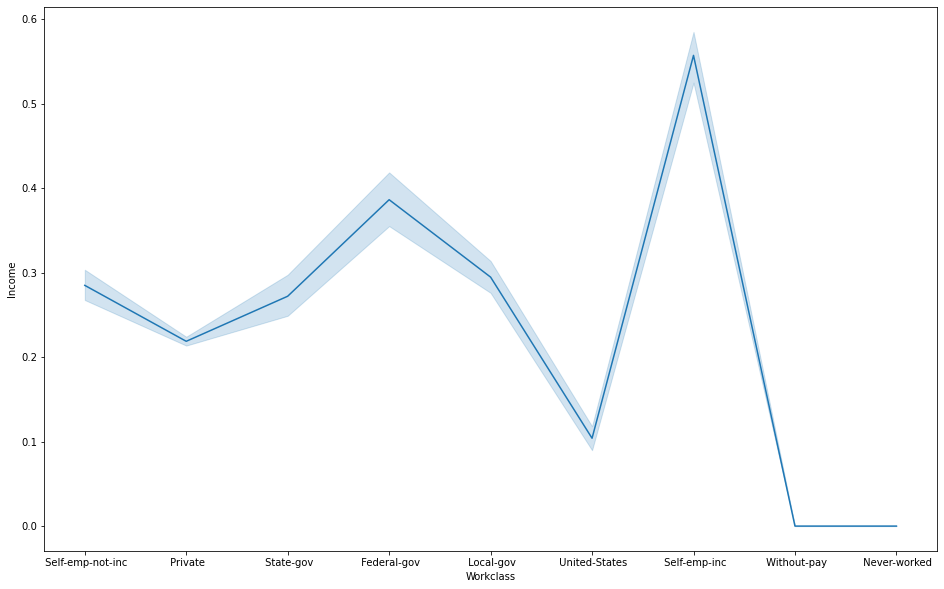

In [21]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Workclass",y="Income",data=df)
plt.show()

The highest income is for Self-emp-inc

In [22]:
cat['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

In [23]:
# education Category
df["Education"]= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df["Education"] = df.Education.replace('HS-grad', 'high school')
df["Education"]= df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher Education')


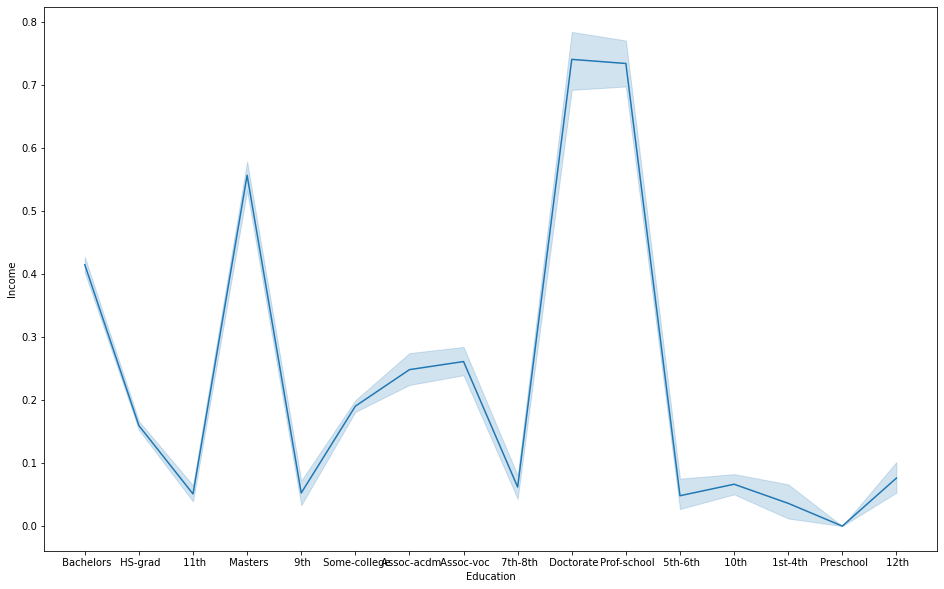

In [24]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Education",y="Income",data=df)
plt.show()

Doctrate and Prof-school has highest income

In [25]:
cat['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [26]:
df['Marital_status']= df['Marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')

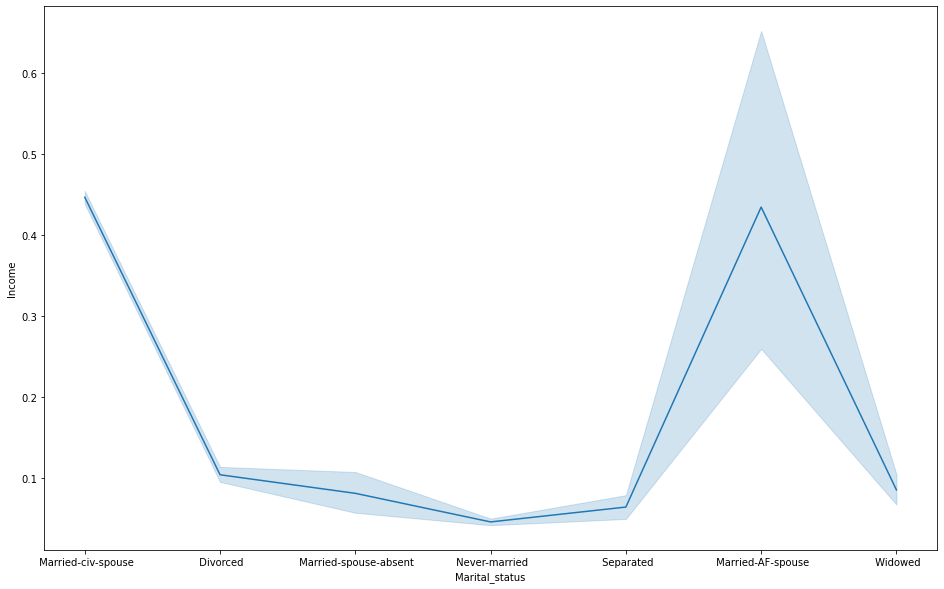

In [27]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Marital_status",y="Income",data=df)
plt.show()

Married people have highest income

In [28]:
cat['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

It has ? in it

In [29]:
df['Occupation'] = df['Occupation'].str.replace('?', 'Prof-specialty')

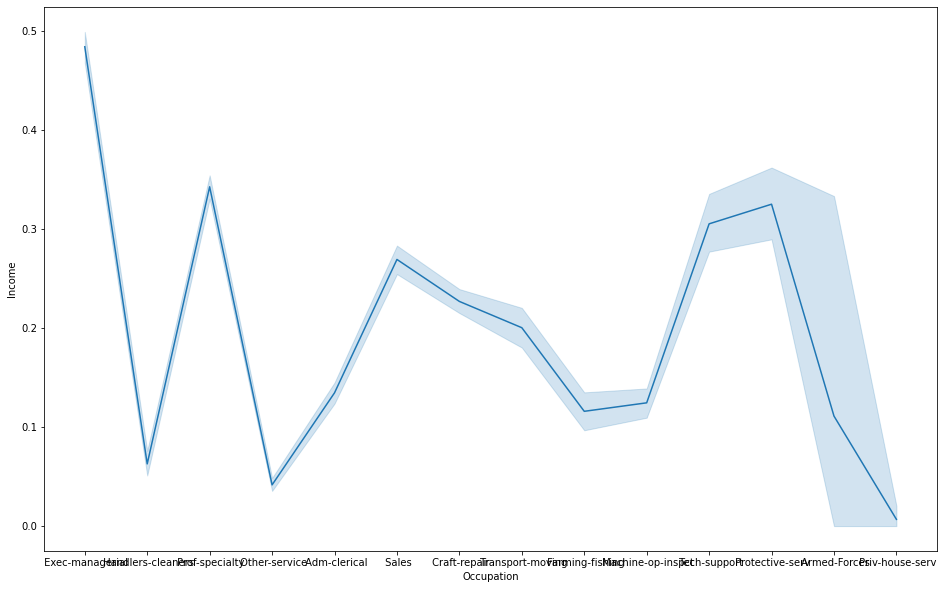

In [30]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Occupation",y="Income",data=df)
plt.show()

Highest income is for Exec-managerial

In [31]:
cat['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

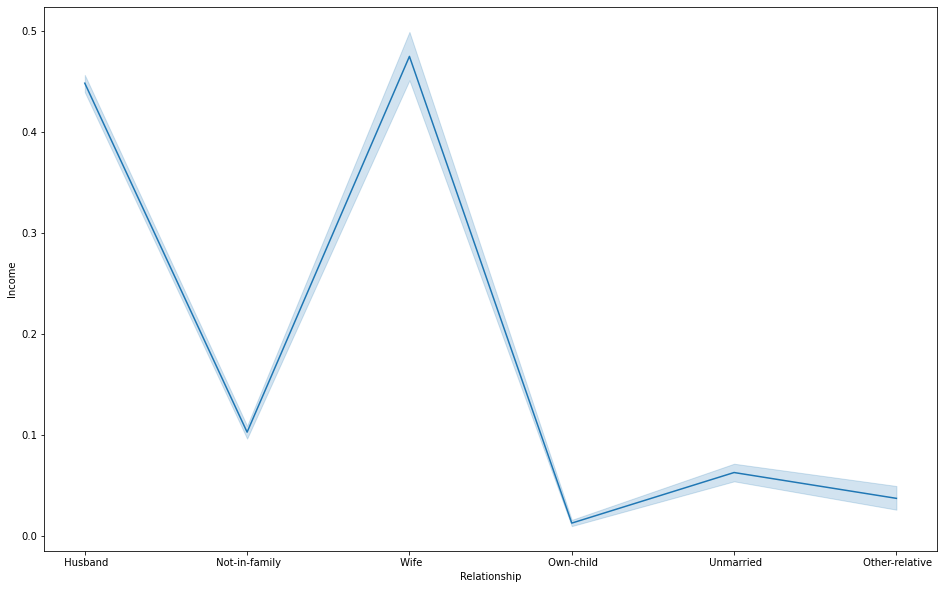

In [32]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Relationship",y="Income",data=df)
plt.show()

Highest income is for married Wife with no child and married husband with no child

In [33]:
cat['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

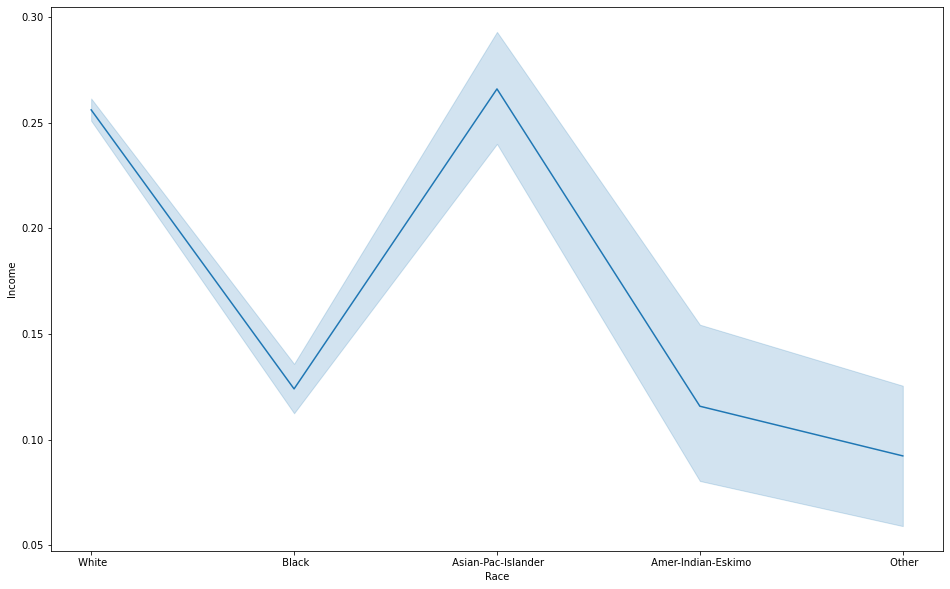

In [34]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Race",y="Income",data=df)
plt.show()

Highest salary is for Asian Pac Islander

In [35]:
cat['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

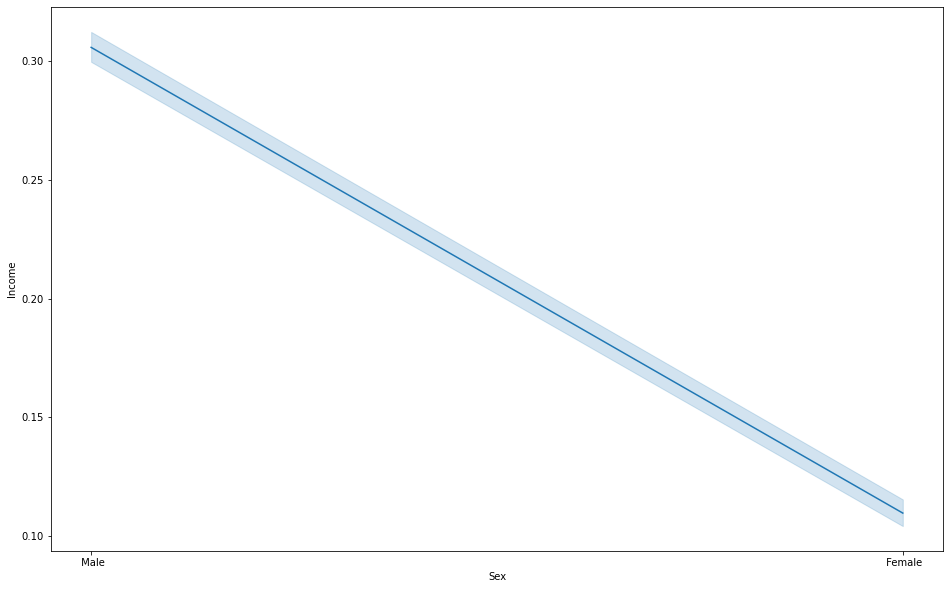

In [36]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Sex",y="Income",data=df)
plt.show()

Highest salary for male

In [37]:
cat['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

it has ? in it

In [38]:
df['Native_country'] = df['Native_country'].str.replace('?', 'United-States')

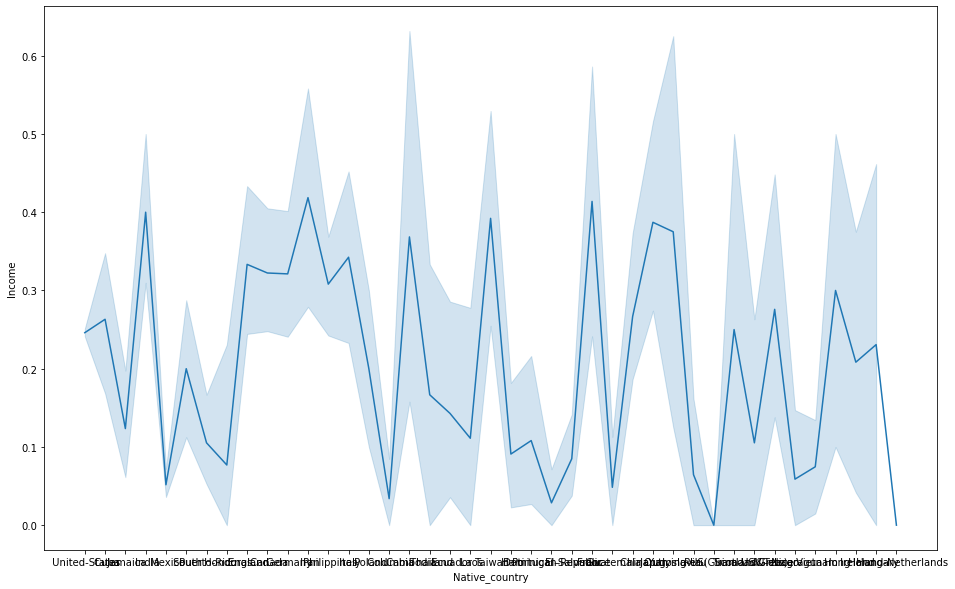

In [39]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Native_country",y="Income",data=df)
plt.show()

In [40]:
cat['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

class is imbalanced

1 is >50K

0 is <=50K

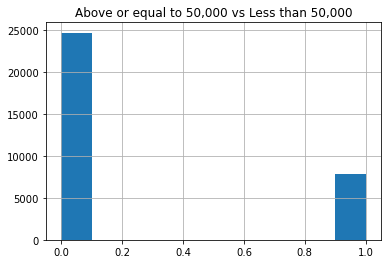

In [41]:
#checking class imbalance
df["Income"].hist(grid=True)
plt.title("Above or equal to 50,000 vs Less than 50,000")
plt.show()

Class is imbalanced hence better to use ROC AUC score

In [42]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515,0.234039
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900,-0.009521
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426,0.335299
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408,0.223340
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229,0.150498
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000,0.229659
Income,0.234039,-0.009521,0.335299,0.223340,0.150498,0.229659,1.000000


# Understanding and eda on numerical data

In [43]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Income'],
      dtype='object')

In [44]:
num=df[{'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss','Hours_per_week'}]

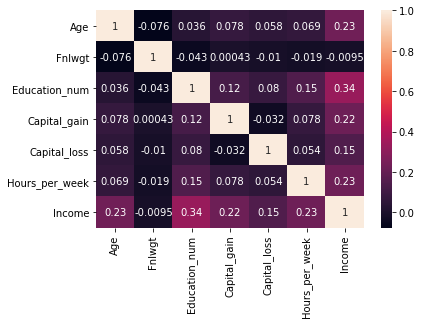

In [45]:
# Multicollinearity
sns.heatmap(df.corr(), annot=True);

In [46]:
#vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(num)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=num.columns
vif

,quality,feature
0,1.026715,Capital_gain
1,1.007758,Fnlwgt
2,1.043769,Education_num
3,1.013461,Capital_loss
4,1.019252,Age
5,1.031975,Hours_per_week


No high multicollinearity is seen among the features

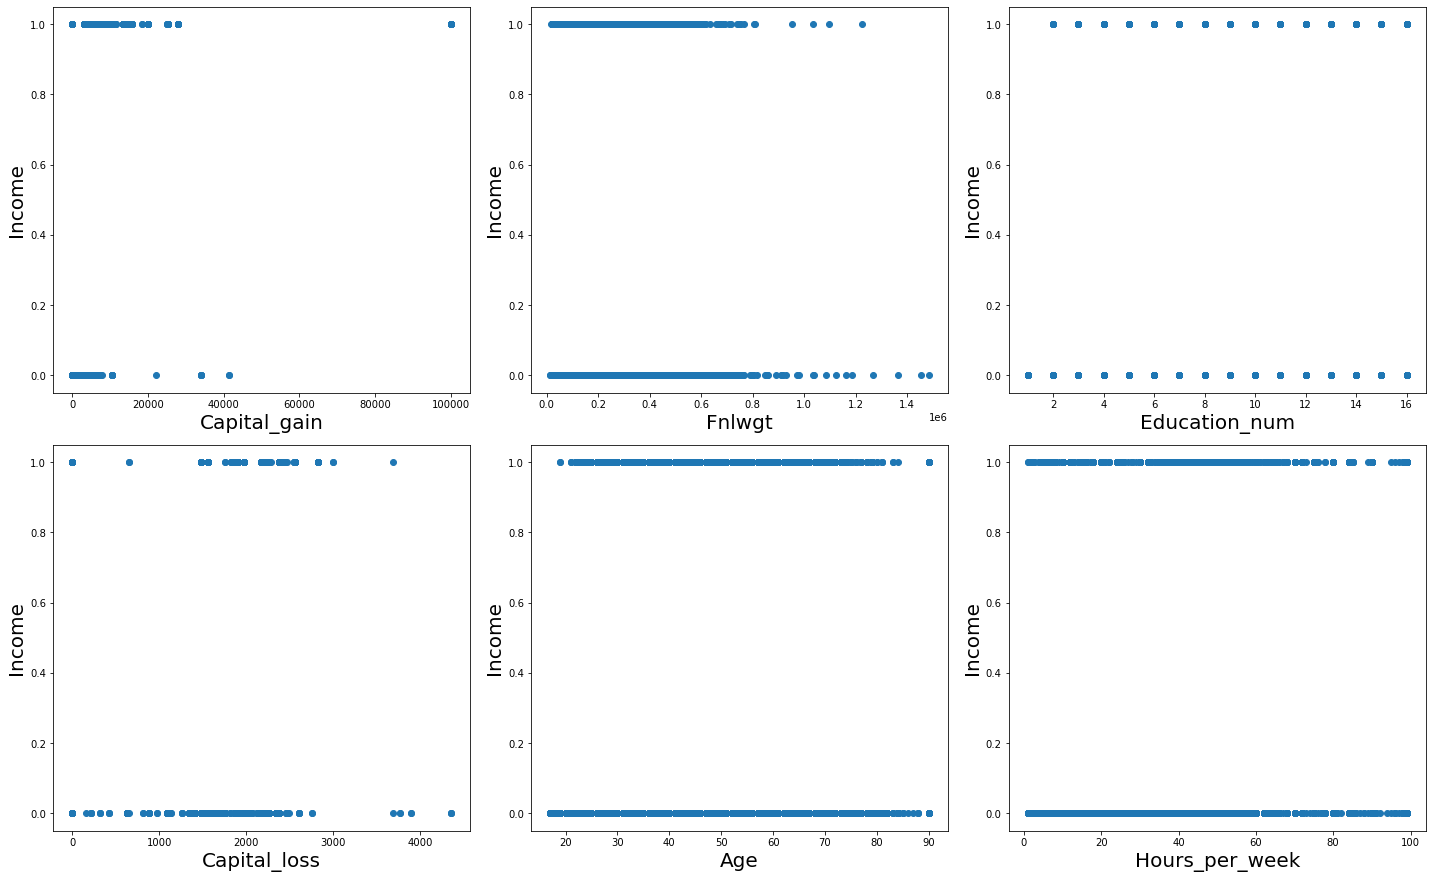

In [47]:
#Analysing the relationship between numerical features and income

y_table=df['Income']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()

1 is >50K

0 is <=50K

Observation

1.Most of the age group have same impact of salary

2.When capital gains are higher, the salary is higher upto 40,000

3.The Fnwlgt, capital loss, education_num and hours per week have almost the same impact on the income

In [48]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Capital_loss      0.150498
Fnlwgt           -0.009521
Name: Income, dtype: float64

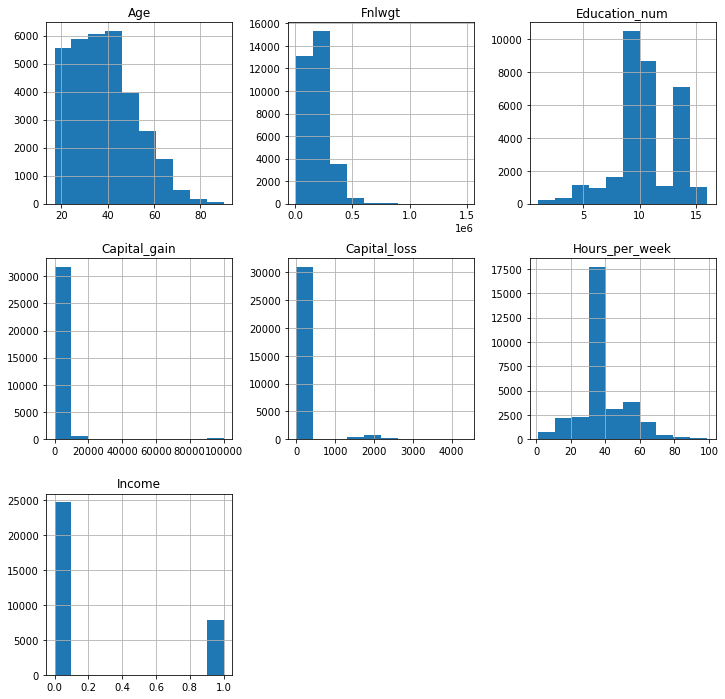

In [49]:
# Histogram- understanding the numerical data
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

Observations

1.High skewess is seen in some of the features

2.Age varies between 18 to 89 and the income is highest in the 45years age 

3.Education_num 10 is highest

4.Capital gain is highest in 10,000

5.Highest capital loss is between 0 and 500

6.Highest per week is between 30 and 40

In [50]:
#finding and reducing outliers and skewness

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  32536
columns after applying zscore:  29808


In [51]:
df=df_new

In [52]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

Capital_gain and capital_loss has very high skewness

In [53]:
#removing skewness using log1p
num=df[{'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss','Hours_per_week'}]

for col in num:
    if num.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [54]:
df.skew()

Age                0.491125
Fnlwgt            -0.953232
Education_num     -0.169811
Capital_gain       3.115925
Capital_loss      25.102455
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

After applying transform also the skewness is high, hence if the accuracy is too low we can drop it

# Encoding

In [55]:
#one hot encoding on data
df=pd.get_dummies(df)

#standardising the data for PCA
x=df.drop(columns=["Income"])
y=df['Income']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  4.36491472,   7.24647635,   9.75027007,  12.06516689,
        14.03192057,  15.86859744,  17.54553421,  19.04360905,
        20.48547581,  21.82034717,  23.12811623,  24.3707835 ,
        25.5919109 ,  26.77698096,  27.95960428,  29.13119954,
        30.27439942,  31.41096607,  32.5294786 ,  33.62827255,
        34.71438602,  35.79654052,  36.86003775,  37.9217244 ,
        38.97259356,  40.01543084,  41.05410395,  42.08779275,
        43.11849394,  44.14338872,  45.16357745,  46.18046549,
        47.19368589,  48.2022194 ,  49.20473703,  50.20555574,
        51.20085223,  52.18889451,  53.17572197,  54.15606329,
        55.13446447,  56.11243459,  57.08882842,  58.06382261,
        59.03774056,  60.0103905 ,  60.98278731,  61.95488662,
        62.92670602,  63.8982986 ,  64.86960396,  65.83985747,
        66.80996491,  67.77989928,  68.7478033 ,  69.71465321,
        70.68093349,  71.64600282,  72.60973321,  73.57046258,
        74.52996083,  75.4868708 ,  76.43975444,  77.39

In [56]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  83


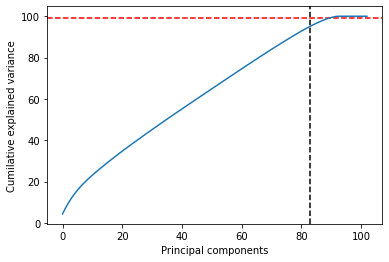

In [57]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [58]:
# Creating final dataset with 85 columns

FinalPCA=PCA(n_components=85)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,2.835852,-1.682029,-0.201182,0.300194,0.354542,0.139195,0.243460,0.798108,1.236845,-2.009033,1.261595,-0.493410,0.153642,-0.007433,0.482742,-0.111418,-0.377117,1.563927,0.031499,-0.691907,-0.536405,-0.435509,-0.559114,-0.830399,0.252225,0.763085,-0.378419,0.241595,-0.304503,0.067967,-0.516946,0.457812,-0.390976,0.426524,-0.591687,-0.337038,0.099126,1.081066,-0.411602,-0.002972,0.100022,-0.212711,-0.096936,-0.244292,0.065608,-0.057653,-0.047553,-0.023034,0.138422,0.014273,-0.200363,-0.028273,-0.058351,-0.244679,0.258475,-0.159789,0.207929,-0.551818,-0.094025,0.063443,-0.164798,-0.370095,0.124620,0.346946,-0.106906,0.236266,-0.586835,-0.198997,-0.598493,0.128686,-0.024958,-0.083176,-0.700627,0.602674,0.133921,-0.230382,-0.278237,-0.812349,0.276514,-0.349227,-1.495288,-0.101026,1.705059,-1.050329,1.730050
1,-0.600894,1.168843,-1.076561,-0.838330,-0.929382,0.405644,-2.358799,0.240396,-1.298312,1.278389,0.146564,-0.080310,0.068737,-0.596578,-0.855085,0.165009,0.299754,0.282597,-0.387374,0.657288,1.288985,0.232852,0.280521,-0.388235,1.027653,0.182521,0.207229,1.017829,0.271979,-0.625055,-0.285836,-1.076368,-0.563376,-0.846839,-1.760224,-1.098347,-1.477188,0.170114,0.869220,-0.593779,-0.121856,-0.049016,0.270363,-0.100625,0.078255,-0.036624,0.150295,0.169718,-0.084766,0.011886,0.026322,0.187215,-0.209076,0.139121,-0.393523,0.297729,0.346872,-0.374453,0.046180,-0.567786,0.059214,-0.012905,0.926434,0.561894,-0.665206,1.500720,-0.086869,-0.383701,-0.669171,-0.880327,0.932887,0.035041,-0.298535,0.481865,0.325407,0.529587,0.757428,0.330062,0.436826,-0.016013,-0.133888,0.403667,0.665499,-0.286416,-0.611542
2,0.939131,2.561773,1.090971,-0.198941,0.509592,-3.051994,0.146097,-1.968032,-1.116365,-1.094976,-0.556531,-1.259669,0.129279,-0.681771,-0.141572,0.286453,-0.093096,1.420356,0.533685,0.721029,2.205432,0.947346,0.434021,-0.285567,2.284430,0.366635,-0.288288,0.691477,0.826241,-0.673279,-2.492101,-0.989910,-1.221898,0.803275,-0.922400,-0.136203,-1.018488,0.868111,1.450073,-0.241664,-0.157157,0.203046,0.217867,-0.236210,-0.055088,-0.067343,0.062811,0.047049,-0.118375,-0.090403,-0.241022,0.043048,0.023749,-0.338392,-0.260521,0.171977,0.358297,-0.834766,0.156346,-0.547287,0.745571,0.750728,0.303963,0.571132,-0.944541,0.699603,0.952928,-0.481736,-0.159311,-1.487353,1.572385,-0.332180,-1.174957,0.036994,-0.444087,-0.084365,0.706779,-0.368840,-0.173228,0.853067,1.274638,-0.090075,0.317276,0.525695,-0.056217
3,-1.130008,-1.663324,4.582731,0.547775,-0.317970,1.083359,3.206838,-3.490044,-0.335654,-0.744320,2.052634,1.166772,-0.952177,0.810390,0.495106,2.531211,-1.338313,-0.189449,-2.259319,-1.435990,1.690871,0.796141,-1.922457,0.953536,-0.361977,1.698234,1.893957,-1.145276,0.750326,-3.699037,2.425295,-2.045503,1.693278,0.223741,-1.277806,3.124409,-3.403846,0.425274,1.034049,4.003073,2.084021,-5.806472,-6.390942,-1.458450,1.419870,-1.085376,-0.380561,4.784208,-1.059492,-2.374638,-0.860601,-2.097457,2.046406,-2.151546,-0.422666,-0.594243,0.725354,-1.470188,-2.671225,4.691023,-3.521466,-4.228482,0.047721,0.542859,-1.669088,-1.705917,0.892755,-4.734605,-0.774323,-1.592348,1.419352,-0.843362,-1.702398,-0.124262,0.466977,-0.690984,-0.100500,0.368395,0.359209,0.193683,2.623479,-2.830320,0.103559,2.165753,-1.197427
4,0.182982,-2.725631,0.343931,-0.632153,-1.386531,1.034950,3.434315,-1.162448,-0.212886,0.052438,1.708435,-1.234468,0.571050,0.528032,0.128740,-0.263624,2.355234,-0.261010,-1.051782,1.871105,0.323011,0.910524,-0.710433,-1.021523,0.601423,0.648461,-0.959194,0.538397,0.330198,0.541331,0.340046,-0.323216,1.536211,0.450735,-0.165393,-0.159314,0.198850,0.211460,0.167715,0.401684,-0.242814,0.042880,0.238017,0.073937,-0.009903,-0.055375,0.083377,-0.053686,0.153441,0.111452,-0.030398,0.242328,-0.281478,-0.22633

In [59]:
df=FinalData2

# Splitting data

In [60]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [61]:
y_train.head()

7104     0
21881    0
17456    0
8318     0
14681    0
Name: Income, dtype: int32

# Finding best random state

In [62]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8581588835212024 on Random State 177


In [63]:
 x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=74)

# Modelling

In [64]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8568169618894257
[[5409  390]
 [ 677  976]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5799
           1       0.71      0.59      0.65      1653

    accuracy                           0.86      7452
   macro avg       0.80      0.76      0.78      7452
weighted avg       0.85      0.86      0.85      7452



In [65]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8118625872249061
[[5063  736]
 [ 666  987]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5799
           1       0.57      0.60      0.58      1653

    accuracy                           0.81      7452
   macro avg       0.73      0.74      0.73      7452
weighted avg       0.81      0.81      0.81      7452



In [66]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8553408480944713
[[5374  425]
 [ 653 1000]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5799
           1       0.70      0.60      0.65      1653

    accuracy                           0.86      7452
   macro avg       0.80      0.77      0.78      7452
weighted avg       0.85      0.86      0.85      7452



In [67]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8486312399355878
[[5419  380]
 [ 748  905]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5799
           1       0.70      0.55      0.62      1653

    accuracy                           0.85      7452
   macro avg       0.79      0.74      0.76      7452
weighted avg       0.84      0.85      0.84      7452



In [68]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8431630095227612
Cross validation score of Decision Tree model : 0.8096151823484654
Cross validation score of Random Forest model : 0.8501075845731234
Cross validation score of SVC model : 0.8407811571367304


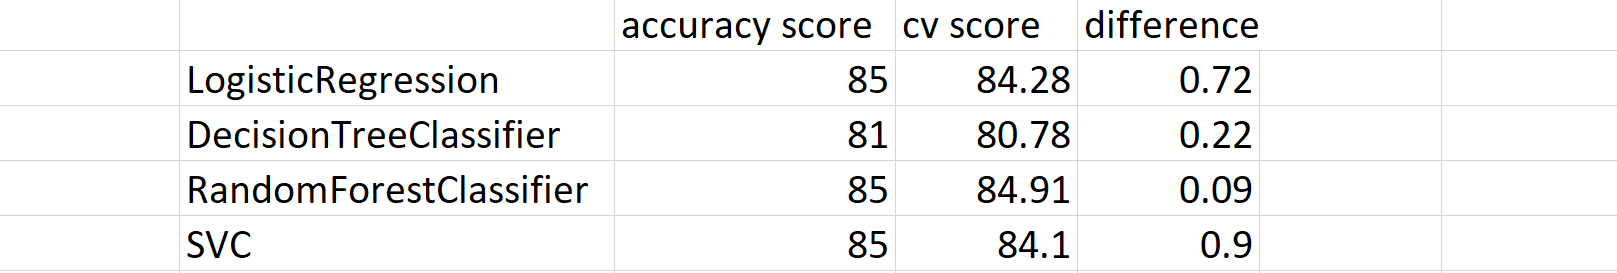

The difference is least for RandomForestClassifier

# ROC AUC curve

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print("Logistic regression score is: ",lr.score(x_test,y_test))
print("Decision tree score is ",dt.score(x_test,y_test))
print("Random forest score is",rf.score(x_test,y_test))
print("K-neighbour score is",kn.score(x_test,y_test))

Logistic regression score is:  0.8568169618894257
Decision tree score is  0.8109232420826624
Random forest score is 0.8523886205045625
K-neighbour score is 0.8303811057434246


In [70]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.7628579181153018

In [71]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7615943233219071

In [72]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7417972746411939

In [73]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.7334040320488325

the AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.

The AUC score shows that RandomForestClassifer is the best classifier among this.

# Hyperparameter tuning

In [74]:
#HyperParameter tuning
from sklearn.model_selection import GridSearchCV 
paramters={'n_estimators':[2,3,4,5],
           'criterion':['gini','entropy'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

GCV=GridSearchCV(RandomForestClassifier(),paramters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]})

In [75]:
GCV.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 5}

In [76]:
mod=RandomForestClassifier(criterion='gini',max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=2,n_estimators=5)

In [77]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

83.064949006978


In [78]:
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

# Saving of model

In [79]:
filename='finalized_model.pickle'
pickle.dump(classifier,open(filename,'wb'))

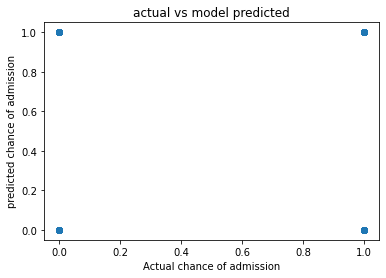

In [80]:
#Adjusted accuracy
classifier.score(x_train,y_train)
y_pred=classifier.predict(x_test)
plt.scatter(y_test,y_pred)

plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [81]:
print(confusion_matrix(y_test, y_pred))

[[5369  430]
 [ 660  993]]


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5799
           1       0.70      0.60      0.65      1653

    accuracy                           0.85      7452
   macro avg       0.79      0.76      0.78      7452
weighted avg       0.85      0.85      0.85      7452



In [83]:
print('Precision =' , 5375/(5375+664))

Precision = 0.8900480211955621


In [84]:
print('Recall =', 5375/(5375+424))

Recall = 0.9268839455078461


# Accuracy and ROC AUC score of our model

In [85]:
scr=cross_val_score(classifier,x,y,cv=5)
print("Cross validation score of Random forest model :", scr.mean())

Cross validation score of Random forest model : 0.8517178443962689


In [86]:
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
print("accuracy score of the Random Forest model is",accuracy_score(y_test,pred)*100)

accuracy score of the Random Forest model is 85.56092324208267


In [87]:
classifier.fit(x_train,y_train)
print("ROC AUC Score of the Random forest model is",roc_auc_score(y_test,classifier.predict(x_test)))

ROC AUC Score of the Random forest model is 0.7626826579086637
